# DESeq Differential Expression Analysis

In [3]:
#load necessary packages and functions 
library(DESeq2)
library(ggplot2)
library(tidyverse)

source("RNAseqfunctions.R")
#functions loaded printed below
cat(paste0(readLines("RNAseqfunctions.R"), collapse="\n"))

Catx2gene <- function(dds) {
    Catx2gene <- read.csv("~/SeqFiles/2021_12-02_Ca_Aallele_genename_conversion.csv", header = TRUE)
    Catx2gene <- Catx2gene[match(rownames(dds), Catx2gene$Assembly22),] #matches order of all genes
    all(rownames(dds) == Catx2gene$Assembly22, na.rm=TRUE) #checks that order of genes matched in both files
    row.names(dds) <- Catx2gene$allele_genename 
    head(row.names(dds))
    return(dds)
}

PCA <- function(dataset, title, samplename=FALSE){
    PCAdata <- plotPCA(dataset, intgroup = c( "condition"), returnData = TRUE)
    percentVar <- round(100 * attr(PCAdata, "percentVar"))
    ggplot(PCAdata, aes(x = PC1, y = PC2, color = condition)) +
      geom_point(size =3) +
      xlab(paste0("PC1: ", percentVar[1], "% variance")) +
      ylab(paste0("PC2: ", percentVar[2], "% variance")) +
      coord_fixed()  + ggtitle(title) + {if(samplename == TRUE)geom_text(aes(label=colnames(dataset)),hjust=0, vjust=0)} }

DEseqimport <- function(countdata, sampledata

## load counts and sample table created in mouseexp4/DESeq/CaEf_analysis/loadsamples.ipynb

In [7]:
load("2022_03-31_RNAseqcountsandsamples.RData")


In [8]:
#load counts and table as DDS object with Assembly22 names  
dds_22 <- DEseqimport(Ca_counts, Ca_samples, catx2gene= FALSE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [9]:
#load counts and table as DDS object with orf/gene names 
dds_gene <- DEseqimport(Ca_counts, Ca_samples, catx2gene= TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Generate PCA plots

In [11]:
#normalize/transform samples for PCA analysis 
Ca_vst <- varianceStabilizingTransformation(dds_gene, blind = TRUE, fitType = "local")

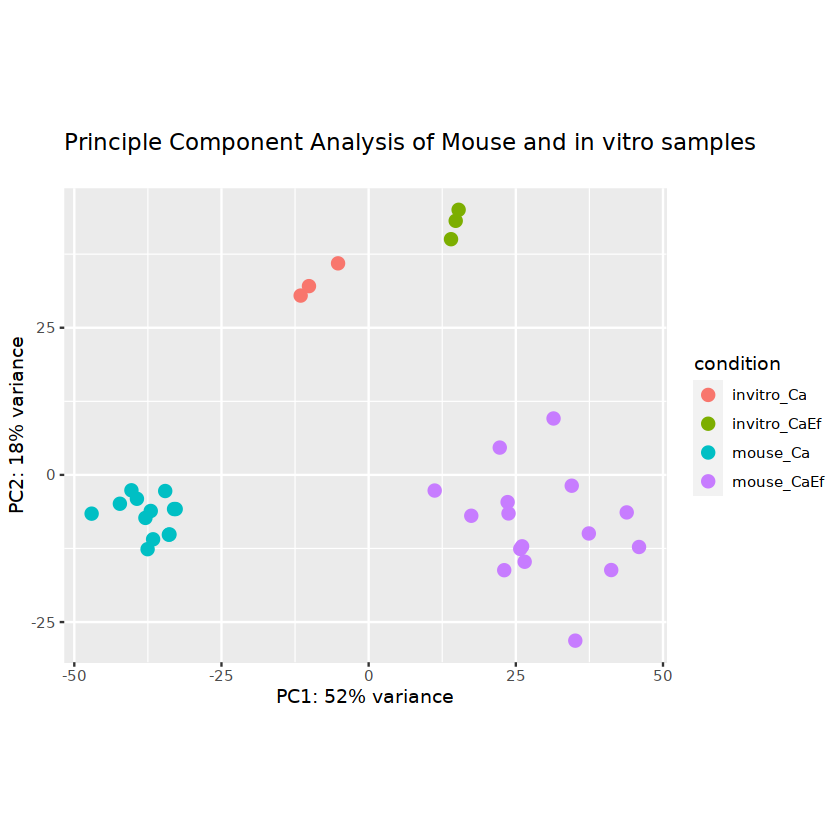

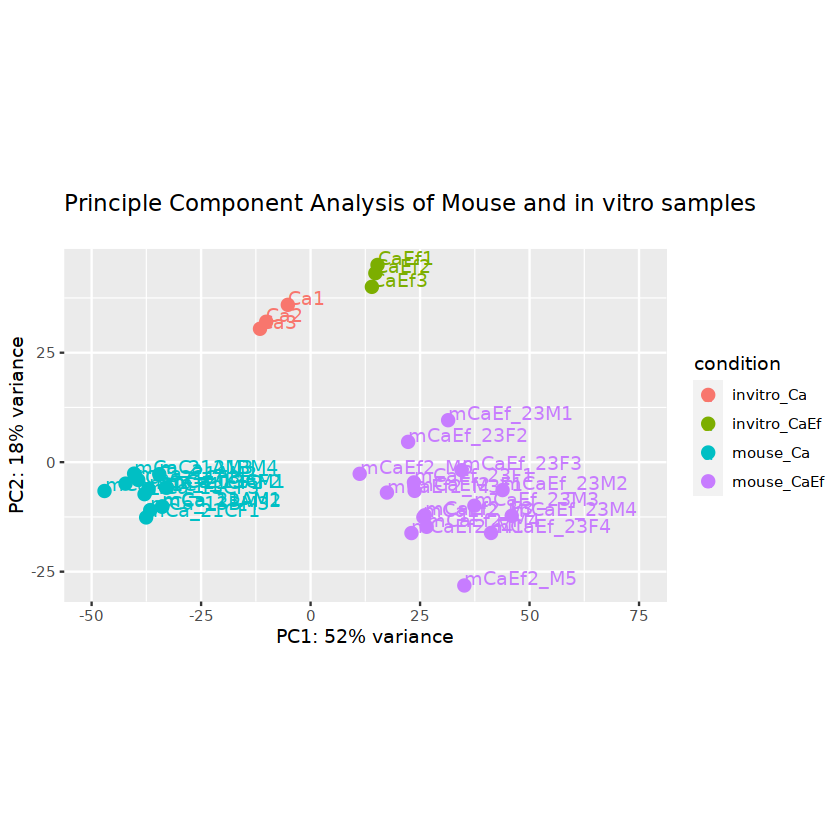

In [15]:
#generate PCA plots 

#without sample names
PCA(Ca_vst, "Principle Component Analysis of Mouse and in vitro samples \n")  

#with sample names
PCA(Ca_vst, "Principle Component Analysis of Mouse and in vitro samples \n", samplename=TRUE) + xlim(-50,75)

Saving 6.67 x 6.67 in image



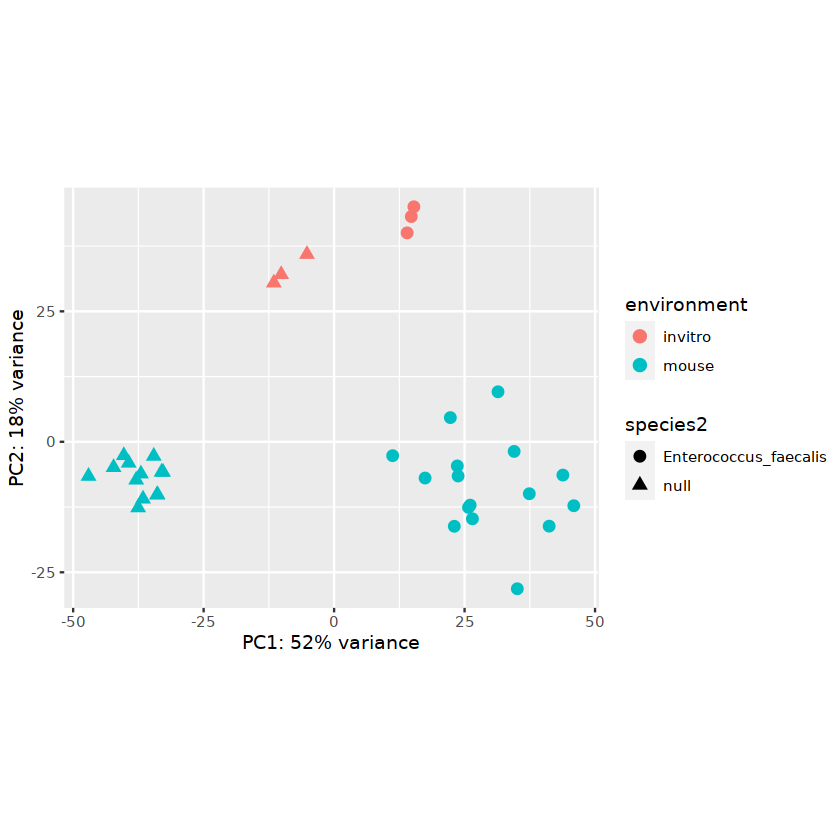

In [9]:
#generate plots with specific coloring 
PCAdata <- plotPCA(Ca_vst, intgroup = c("condition", "species2", "environment" ), returnData = TRUE)
percentVar <- round(100 * attr(PCAdata, "percentVar"))
ggplot(PCAdata, aes(x = PC1, y = PC2, color = environment, shape = species2)) + 
        geom_point(size = 3) + xlab(paste0("PC1: ", percentVar[1], 
        "% variance")) + ylab(paste0("PC2: ", percentVar[2], 
        "% variance")) + coord_fixed() 
ggsave("PCAplotNEW.pdf", last_plot())

In [55]:
#do DE anaylsis of Ca mouse vs. Ca invitro
#generate DEseq object 
dds_DE <- DESeq(dds)
#do LFC analysis comparing Ca mouse vs. invitro 
dds_DELFC <- lfcShrink(dds_DE, contrast = c("condition", "mouse_Ca","invitro_Ca"), type = 'ashr')
#save in CSV file for outside anaylsis 
write.csv(dds_DELFC, file =("LFCres_Caresponse_mousevinvitro_CGDname.csv"))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 319 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



In [60]:
#generate same objects as above for more readability (gene/orf name) 
ddsgene_DE <- DESeq(dds_gene)
ddsgene_DELFC2 <- lfcShrink(ddsgene_DE, contrast = c("condition", "mouse_Ca","invitro_Ca"), type = 'ashr')

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 319 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



Warning message:
“Ignoring unknown parameters: xlim, ylim”


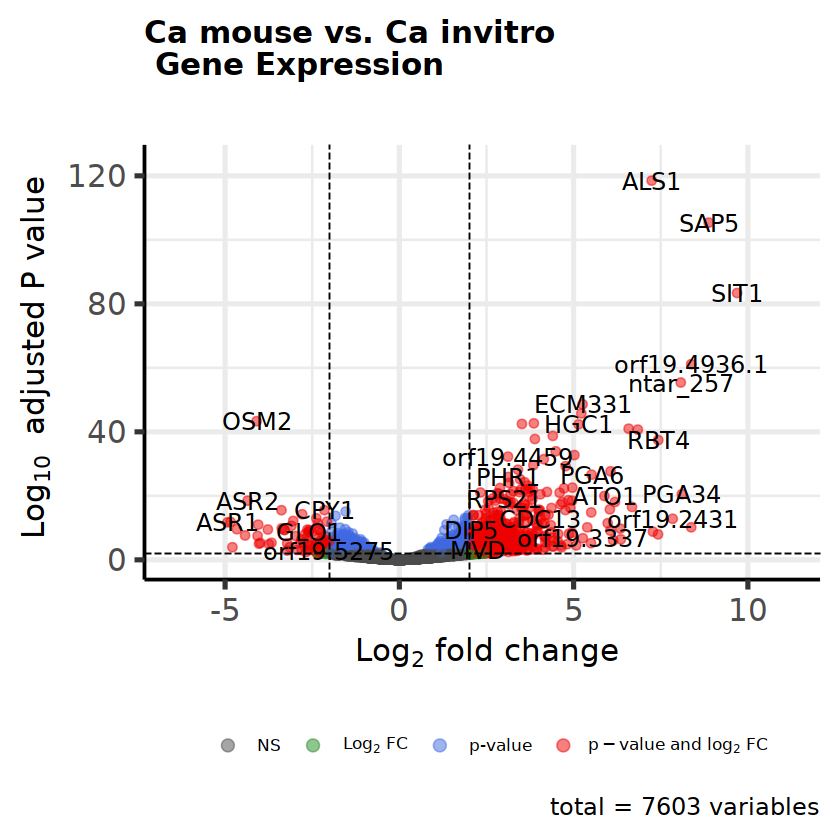

In [78]:
#make volcano plot 
#volplot(LFC sample table, title, see inside function for more changes
volplot(ddsgene_DELFC2, "Ca mouse vs. Ca invitro \n Gene Expression")

working with in vitro and mouse samples seperately

In [83]:
#subset mouse and in vitro samples
samples_invitro <- filter(Ca_samples, condition == 'invitro_Ca' | condition == 'invitro_CaEf' )
invitrolist <-  samples_invitro$samplename
counts_invitro <- Ca_counts[,invitrolist]

samples_mouse <- filter(Ca_samples, condition == 'mouse_Ca' | condition == 'mouse_CaEf' )
mouselist <-  samples_mouse$samplename
counts_mouse <- Ca_counts[,mouselist]

In [89]:
#write csv files saving LFCDEexpression with CGD names
DEseqimport(sampledata = samples_invitro, countdata = counts_invitro, catx2gene = FALSE) %>% 
    DESeq %>% 
    lfcShrink(., contrast = c("condition", "invitro_CaEf","invitro_Ca"), type = 'ashr') %>%
    write.csv(., file =("LFCres_invitro_CaEfvCa_CGDname.csv"))    

DEseqimport(sampledata = samples_mouse, countdata = counts_mouse, catx2gene = FALSE) %>% 
    DESeq %>% 
    lfcShrink(., contrast = c("condition", "mouse_CaEf","mouse_Ca"), type = 'ashr') %>%
    write.csv(., file =("LFCres_mouse_CaEfvCa_CGDname.csv"))    

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“Ignoring unknown parameters: xlim, ylim”


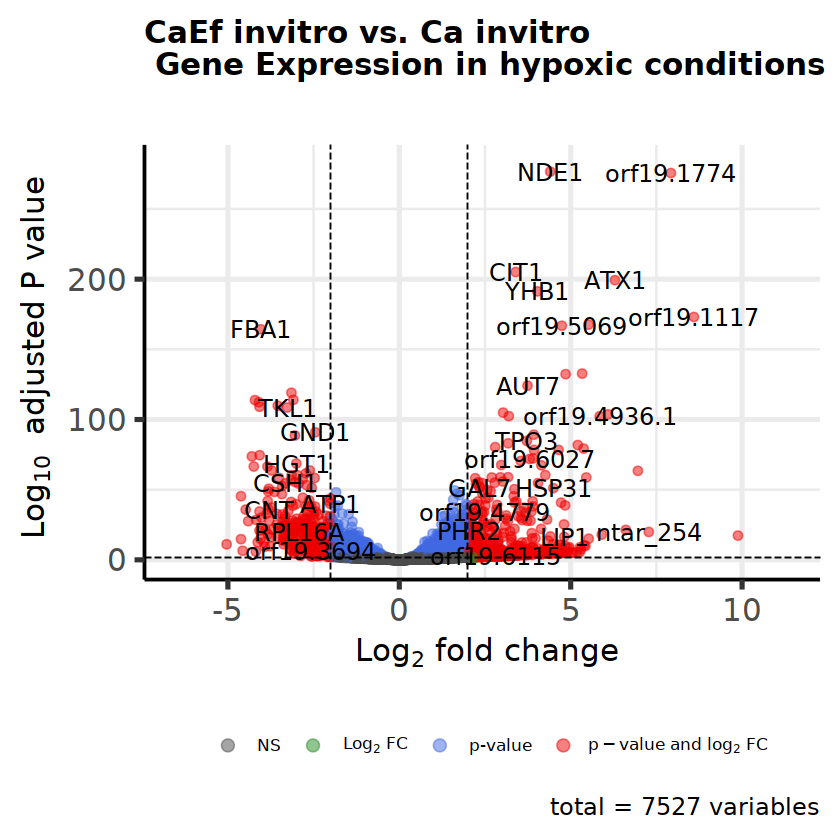

In [94]:
#generate LFC with gene/orf names and make volcano plot - in vitro
DEseqimport(sampledata = samples_invitro, countdata = counts_invitro, catx2gene = TRUE) %>% 
    DESeq %>% 
    lfcShrink(., contrast = c("condition", "invitro_CaEf","invitro_Ca"), type = 'ashr') %>%
    volplot(., "CaEf invitro vs. Ca invitro \n Gene Expression in hypoxic conditions")

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 605 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

Warning message:
“Ignoring unknown parameters: xlim, ylim”


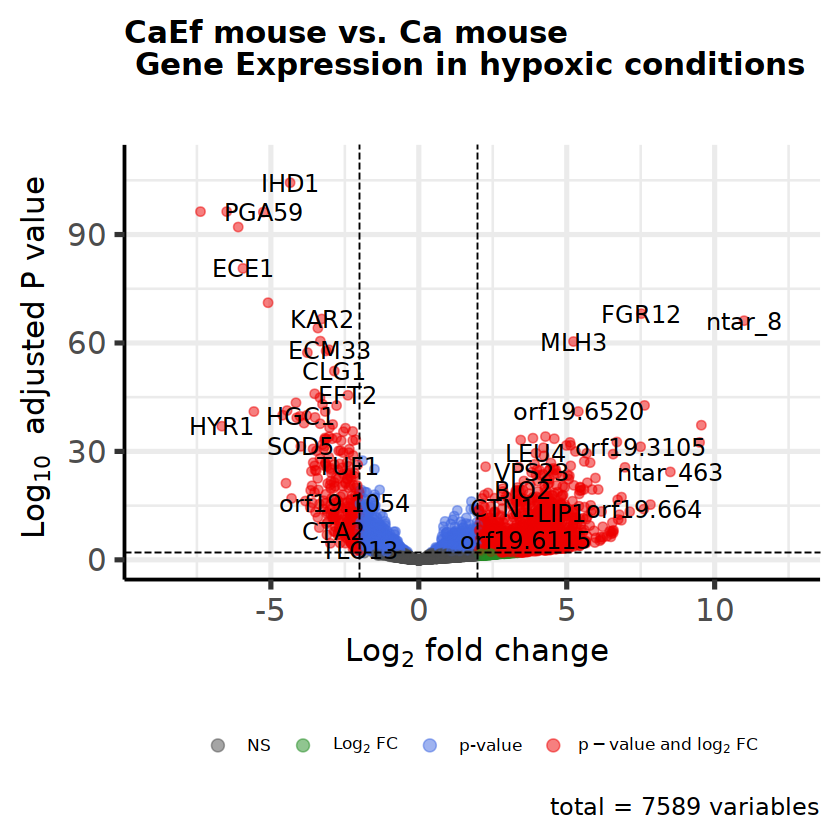

In [95]:
#generate LFC with gene/orf names and make volcano plot - mouse 
DEseqimport(sampledata = samples_mouse, countdata = counts_mouse, catx2gene = TRUE) %>% 
    DESeq %>% 
    lfcShrink(., contrast = c("condition", "mouse_CaEf","mouse_Ca"), type = 'ashr') %>%
    volplot(., "CaEf mouse vs. Ca mouse \n Gene Expression in hypoxic conditions")